<a href="https://colab.research.google.com/github/fvillasb/analise-airbnb/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Malta*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes aos imóveis em Malta e ver quais insights podem ser extraídos a partir de dados brutos.**

Malta é um país situado em um arquipélago no Mediterrâneo central, localizado no Sul da Europa entre a Sicília (Itália) e a costa Norte da África. 

## Obtenção dos Dados


In [ ]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/malta/2022-09-26/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número gerado para a identificação do imóvel;
* `name` - nome do anúncio; 
* `host_id` - número gerado para a identificação do proprietário (anfitrião) do imóvel; 
* `host_name` - nome do anfitrião;
* `neighbourhood_group` - não contém nenhum valor válido;
* `neighbourhood` - bairro onde se encontra o imóvel;
* `latitude` - coordenada da latitude do imóvel;
* `longitude` - coordenada da longitude do imóvel;
* `room_type` - tipo de acomodação;
* `price` - preço de aluguel do imóvel;
* `minimum_nights` - quantidade mínima de noites que o hóspede deverá alugar;
* `number_of_reviews` - quantidade de avaliações que o anúncio recebeu dos clientes;
* `last_review` - data da última avaliação;
* `reviews_per_month` - quantidade de avaliações por mês;
* `calculated_host_listings_count` - quantidade de imóveis oferecidos pelo mesmo anfitrião;
* `availability_365` - quantidade de dias, no período de um ano (365 dias), em que a propriedade está disponível para ser alugada;
* `number_of_reviews_ltm` - quantidade de avaliações nos últimos 12 meses (obs.: ltm = last twelve months);
* `license` - não contém nenhum valor válido

\

Para visualizar o anúncio no Airbnb, use a seguinte URL: https://www.airbnb.com.br/rooms/id  
Onde id deve ser substituído pelo `id` do *dataset* associado ao anúncio.

Por exemplo, o link para o anúncio *Modern apartment in amazing location , sleeps 5*, cujo id é *12522859* ficaria assim: https://www.airbnb.com.br/rooms/12522859

\

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.


In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,617657758083390538,Ellie Boo Bed & Breakfast: King Room,48483565,Ellie,NaN,Xewkija,36.03376,14.252905,Private room,65,1,0,NaN,NaN,3,64,0,NaN
1,12522859,"Modern apartment in amazing location , sleeps 5",46331087,Christopher,NaN,San Pawl il-Bahar,35.94972,14.414200,Entire home/apt,112,4,2,2018-08-11,0.03,1,356,0,NaN
2,51484251,Gajdoru Valley View (shared space),23139730,Sue,NaN,Xaghra,36.05462,14.274920,Private room,45,2,22,2022-09-21,1.62,1,194,13,NaN
3,33426361,Private room in a modern apartment - quiet area,39800152,Jeanette,NaN,Mosta,35.90538,14.422200,Private room,34,4,3,2022-09-06,0.57,4,163,3,NaN
4,16139052,Super spacious maisonette in Rabat,105296958,Helen,NaN,Rabat (Malta),35.87985,14.390250,Entire home/apt,45,3,157,2022-09-25,2.23,1,306,28,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Quantidade de entradas do DataFrame: {}".format(df.shape[0]))
print("Quantidade de variáveis do DataFrame: {} \n".format(df.shape[1]))

# verificar os tipos de variáveis
display(df.dtypes)

Quantidade de entradas do DataFrame: 8505
Quantidade de variáveis do DataFrame: 18 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           1.000000
neighbourhood_group               1.000000
reviews_per_month                 0.172722
last_review                       0.172722
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
name                              0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

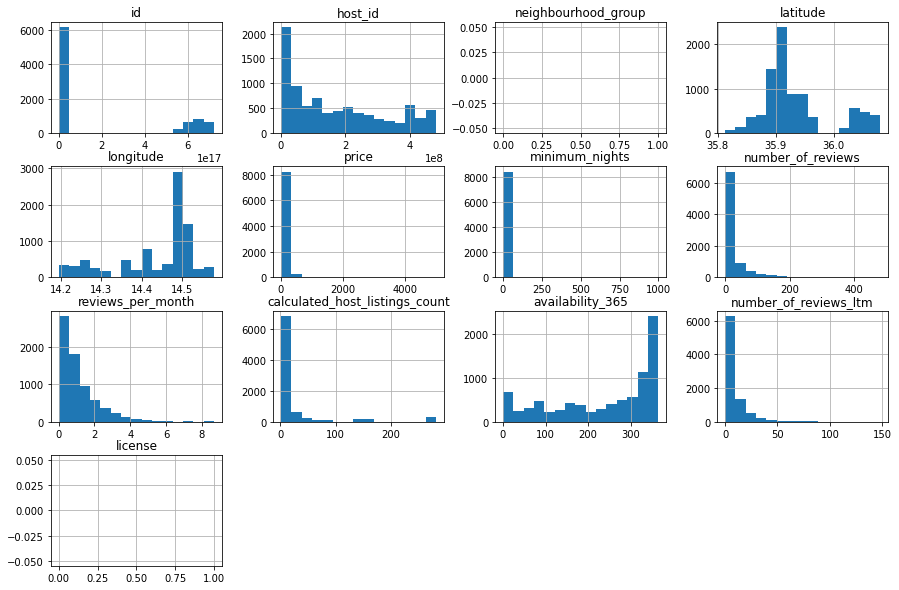

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Limpeza de Dados - Outliers e Valores Ausentes**

Ao analisar a porcentagem de valores ausentes no dataset e o histograma, podemos concluir:
*  Não há nenhum valor de entrada válido para `neighbourhood_group` e `license`;
*  Notam-se sinais da presença de *outliers* em `price`, `minimum_nights`, `number_of_reviews`, `calculated_host_listings_count` e `number_of_reviews_ltm`, tendo em vista que os valores não seguem uma distribuição e distorcem a representação gráfica.

\
#### **Aprofundamento da Análise dos Possíveis Outliers**
Resumo estatístico por meio do método `describe()` para avaliarmos as variáveis que apresentaram sinais da presença de *outliers* 



In [ ]:
# ver o resumo estatístico das variáveis
df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,number_of_reviews_ltm
count,8505.000000,8505.000000,8505.000000,8505.000000,8505.000000
mean,114.257848,4.471605,23.018225,23.523457,7.045973
std,128.433200,25.320730,39.978049,56.797119,10.101024
min,9.000000,1.000000,0.000000,1.000000,0.000000
25%,55.000000,1.000000,1.000000,1.000000,0.000000
50%,84.000000,3.000000,7.000000,4.000000,3.000000
75%,129.000000,3.000000,26.000000,13.000000,10.000000
max,5000.000000,999.000000,480.000000,282.000000,148.000000


O resumo estatístico acima nos leva a confirmar as seguintes hipóteses:
*  `price` possui 75% dos valores abaixo de 129.00, no entanto, seu valor máximo é 5000.00;
*  O valor máximo da quantidade mínima de noites (`minimum_nights`) é maior que a quantidade de dias disponíveis no ano (365 dias);
*  `number_of_reviews`, `calculated_host_listings_count` e `number_of_reviews_ltm` possuem valores máximos muito superior que 75% das entradas registradas nestas variáveis. Contudo, essa hipótese será ignorada tendo em vista que estas variáveis não são relevantes para as análises que serão feitas na sequência.

\
#### **Limpeza dos Dados Ausentes**
Pelo fato de que não há nenhum valor de entrada válido para `neighbourhood_group` e `license`, as colunas serão removidas do dataset.




In [ ]:
# Fazer uma cópia do DataFrame 
df_clean = df.copy()

# Remover as colunas com dados faltantes
df_clean.drop(columns=['neighbourhood_group', 'license'], inplace=True)

# Conferir o novo DataFrame
df_clean.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,617657758083390538,Ellie Boo Bed & Breakfast: King Room,48483565,Ellie,Xewkija,36.03376,14.252905,Private room,65,1,0,NaN,NaN,3,64,0
1,12522859,"Modern apartment in amazing location , sleeps 5",46331087,Christopher,San Pawl il-Bahar,35.94972,14.414200,Entire home/apt,112,4,2,2018-08-11,0.03,1,356,0
2,51484251,Gajdoru Valley View (shared space),23139730,Sue,Xaghra,36.05462,14.274920,Private room,45,2,22,2022-09-21,1.62,1,194,13
3,33426361,Private room in a modern apartment - quiet area,39800152,Jeanette,Mosta,35.90538,14.422200,Private room,34,4,3,2022-09-06,0.57,4,163,3
4,16139052,Super spacious maisonette in Rabat,105296958,Helen,Rabat (Malta),35.87985,14.390250,Entire home/apt,45,3,157,2022-09-25,2.23,1,306,28


#### Limpeza dos *Outliers*

Para tratar dos outliers desse conjunto de dados, calcularemos os limites utilizando a regra do IQR Score e executaremos as etapas listadas abaixo.

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Plotar um boxplot para avaliar o impacto da limpeza no DataSet original
* Remover os outliers.

O IQR é calculado por meio da subtração do Terceiro Quartil (75%) pelo Primeiro Quartil (25%) obtidos no resumo estatístico. 

# IQR = Q3 - Q1





##### **Limpeza da Variável `price`**  

In [ ]:
# identificando os outliers para a variável price
q1_price = df_clean.price.quantile(.25)
q3_price = df_clean.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior do price: ', sup_price)
print('Limite inferior do price: ', inf_price)

IQR da variável price:  74.0
Limite superior do price:  240.0
Limite inferior do price:  -56.0


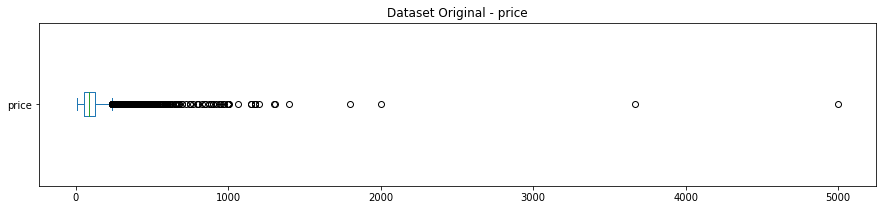

O Dataset possui 8505 colunas
665 entradas acima do limite superior
Representam 7.82% do Dataset


In [ ]:
# boxplot da variável price antes da limpeza
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O Dataset possui {} colunas".format(df_clean.shape[0]))
print("{} entradas acima do limite superior".format(len(df_clean[df_clean.price > sup_price])))
print("Representam {:.2f}% do Dataset".format((len(df_clean[df_clean.price > sup_price]) / df_clean.shape[0])*100))

In [ ]:
# Remoção dos outliers da variável price
df_clean.drop(df_clean[df_clean.price > sup_price].index, axis=0, inplace=True)

print("Volume de dados antes da limpeza: ", df.shape)
print("Volume de dados após a limpeza: ", df_clean.shape)

Volume de dados antes da limpeza:  (8505, 18)
Volume de dados após a limpeza:  (7840, 16)


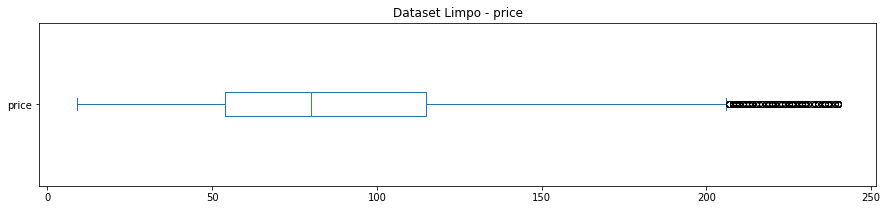

Tamanho original: 8505 entradas
Tamanho após a limpeza: 7840 entradas


In [ ]:
# boxplot da variável price após a limpeza
fig, ax = plt.subplots(figsize=(15, 3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title("Dataset Limpo - price")
plt.show()

print("Tamanho original: {} entradas".format(df.shape[0]))
print("Tamanho após a limpeza: {} entradas".format(df_clean.shape[0]))

##### **Limpeza da Variável `minimum_nights`**  

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df_clean.minimum_nights.quantile(.25)
q3_minimum_nights = df_clean.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print("IQR da variável minimum_nights: ", IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print("Limite superior de minimum_nights: ", sup_minimum_nights)
print("Limite inferior de minimum_nights: ", inf_minimum_nights)

IQR da variável minimum_nights:  2.0
Limite superior de minimum_nights:  6.0
Limite inferior de minimum_nights:  -2.0


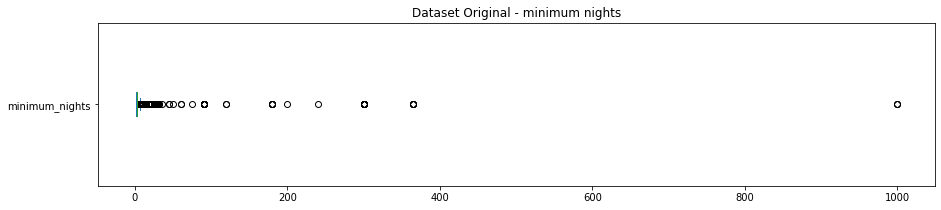

O Dataset possui 7840 entradas
535 entradas acima do limite superior
Representam 6.82% do dataset


In [ ]:
# boxplot da variável minimum_nights antes da limpeza
fig, ax = plt.subplots(figsize=(15,3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title("Dataset Original - minimum nights")
plt.show()
print("O Dataset possui {} entradas".format(df_clean.shape[0]))
print("{} entradas acima do limite superior".format(len(df_clean[df_clean.minimum_nights > sup_minimum_nights])))
print("Representam {:.2f}% do dataset".format((len(df_clean[df_clean.minimum_nights > sup_minimum_nights]) / df_clean.shape[0]) *100))

In [ ]:
# Remoção dos outliers da variável minimum_nights
print("Volume de dados antes da limpeza: ", df_clean.shape)
df_clean.drop(df_clean[df_clean.minimum_nights > sup_minimum_nights].index, axis=0, inplace=True)

print("Volume de dados após a limpeza: ", df_clean.shape)

Volume de dados antes da limpeza:  (7840, 16)
Volume de dados após a limpeza:  (7305, 16)


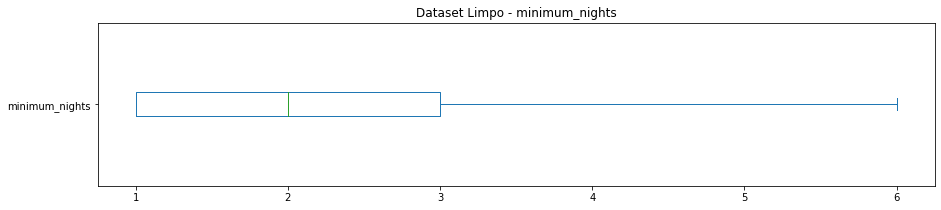

Tamanho original: 8505 entradas
Tamanho após a limpeza: 7305 entradas


In [ ]:
# boxplot da variável minimum_nights após a limpeza
fig, ax = plt.subplots(figsize=(15, 3))
df_clean.minimum_nights.plot(kind='box', vert=False);
ax.set_title("Dataset Limpo - minimum_nights")
plt.show()

print("Tamanho original: {} entradas".format(df.shape[0]))
print("Tamanho após a limpeza: {} entradas".format(df_clean.shape[0]))

#### **Distribuição e Resumo Estatístico das Variáveis Após a Limpeza**

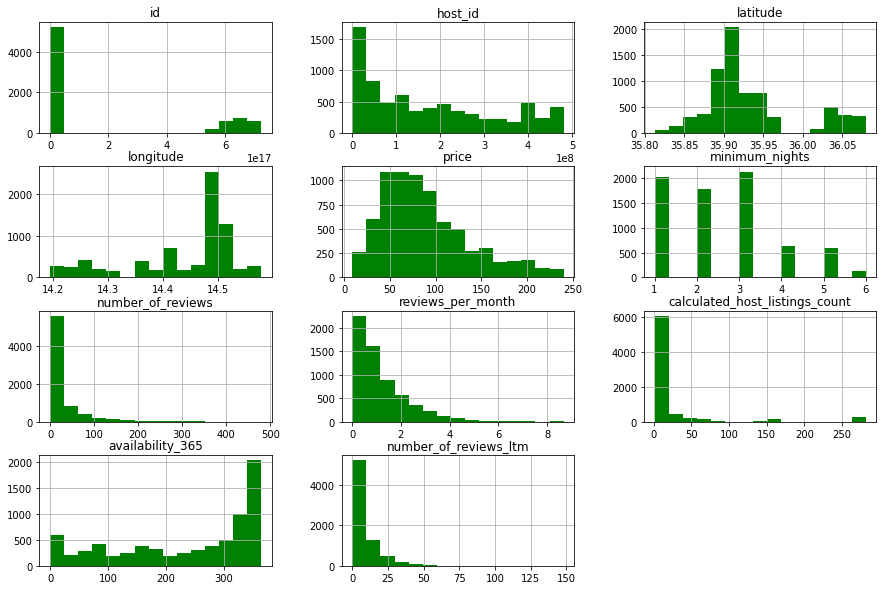

In [ ]:
# verificando as distribuições 
df_clean.hist(bins=15, figsize=(15, 10), color='green');

In [ ]:
# distribuição estatística dos dados limpos
df_clean[['price', 'minimum_nights']].describe()

,price,minimum_nights
count,7305.000000,7305.000000
mean,89.319097,2.498700
std,48.221944,1.292632
min,9.000000,1.000000
25%,54.000000,1.000000
50%,80.000000,2.000000
75%,114.000000,3.000000
max,240.000000,6.000000


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna price antes da limpeza
print("Média dos preços de aluguel antes da limpeza: US$ {:.2f}".format(df.price.mean()))

# ver a média da coluna price após a limpeza
print("Média dos preços de aluguel após a limpeza: US$ {:.2f}".format(df_clean.price.mean()))


Média dos preços de aluguel antes da limpeza: US$ 114.26
Média dos preços de aluguel após a limpeza: US$ 89.32


### **Q4. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',  
                 'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.088039,-0.129435,-0.145780,0.195045,0.103175
minimum_nights,0.088039,1.000000,0.033872,-0.152877,-0.044983,-0.060278
number_of_reviews,-0.129435,0.033872,1.000000,0.345533,-0.151116,-0.049471
reviews_per_month,-0.145780,-0.152877,0.345533,1.000000,-0.093104,0.013160
calculated_host_listings_count,0.195045,-0.044983,-0.151116,-0.093104,1.000000,0.188944
availability_365,0.103175,-0.060278,-0.049471,0.013160,0.188944,1.000000


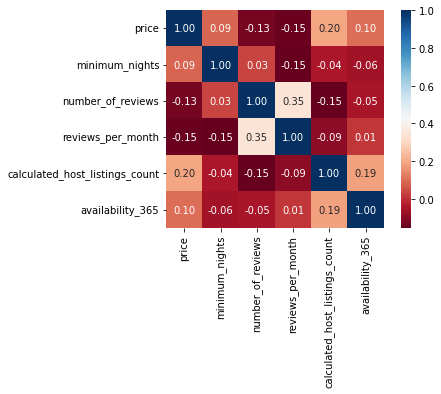

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', square=True, fmt='.2f', linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    4740
Private room       2298
Shared room         159
Hotel room          108
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0]) * 100

Entire home/apt    64.887064
Private room       31.457906
Shared room         2.176591
Hotel room          1.478439
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Ghasri         149.384615
Sannat         133.000000
Gharb          127.703704
San Lawrenz    116.979167
Xewkija        116.302326
Kercem         114.184211
Valletta       113.205742
Xaghra         111.468599
Kalkara        110.041667
Iklin          107.960000
Name: price, dtype: float64

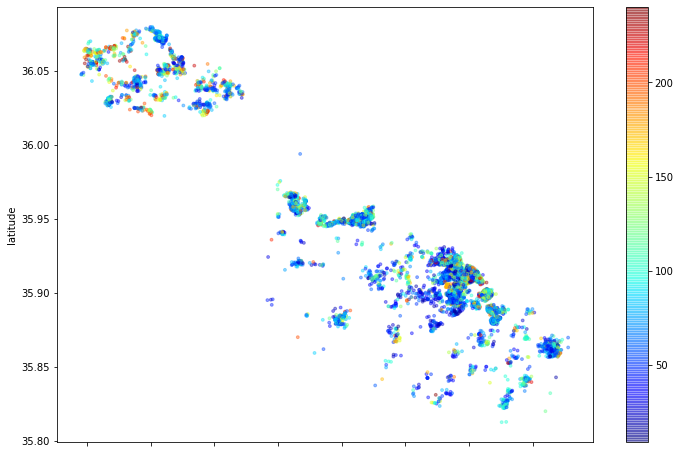

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print("Média da coluna minimum_nights: {}".format(df_clean.minimum_nights.mean()))

Média da coluna minimum_nights: 2.4986995208761122


## Conclusões



O *dataset* utilizado é uma versão resumida do conjunto de dados disponíveis no Airbnb, por este motivo ele é adequado para uma análise inicial. 

Dito isso, concluimos que a nossa análise inicial possibilitou a identificação de *outliers* no *dataset* e a avaliação das distorções causadas por eles na análise exploratória de dados. 

Notamos que os métodos utilizados para a limpeza dos dados (valores ausentes e *outliers*) foram eficientes e reduziram as distorções nos resultados das análises. 

Os meus conhecimentos a respeito de Malta, as informações obtidas por pesquisas no Google, a lógica e o senso comum, permitem-me concluir que os resultados obtidos nas análises exploratórias são consistentes e razoáveis. Listo abaixo os resultados que reforçam esta tese.

*   O valor 2 para a média do mínimo de noites para aluguel é razoável, pois geralmente Malta é um destino turístico;
*   Os bairros indicados como detentores dos imóveis, em média, mais caros,  estão localizados na ilha de Gozo, que é uma famosa região de Malta onde há muitas atrações turísticas. Além disso, trata-se de uma região remota, acessível via barco. 







